# Trabajo Practico 1 - Simulación

## Ejercicio 1:
### a) Implementar un Generador Congruencial Lineal (GCL) de módulo 2^32, multiplicador 1013904223, incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

### Un+1 = (a * Un + c) 𝑚𝑜𝑑 m

In [ ]:
a = 1013904223
c = 1664525
m = 2**32
u0 = (99139 + 99162 + 99441 + 100701) // 4

In [ ]:
def gcl_a(a,c,m,u0,cant_num):
    results = []
    for x in range(cant_num):
        u = (a * u0 + c) % m
        u0 = u
        results.append(u)
    return results

#### b) Modificar el GCL implementado en el punto a) para que devuelva números al azar entre 0 y 1

In [ ]:
def gcl_b(a,c,m,u0,cant_num):
    results_gcl_a = gcl_a(a,c,m,u0,cant_num)
    return [number/m for number in results_gcl_a]

#### c) Realizar los gráficos que considere necesarios para mostrar las distribuciones de números al azar generados en los puntos a) y b)

### a = (Xmax - Xmin) / (1+log2(N))

In [ ]:
import math

In [ ]:
def sturges_width(max,min,n):
    aux = 1 + math.log2(n)
    return (max-min) / aux

def sturges_bins(n):
    return 1 +  math.log2(n)

In [ ]:
#Defino una cantidad de muestras de 500000
cant = 500000
results_a = gcl_a(a,c,m,u0,cant)
results_b = gcl_b(a,c,m,u0,cant)
width_a = sturges_width(max(results_a),min(results_a),cant)
width_b = sturges_width(max(results_b),min(results_b),cant)
bins_a = (max(results_a) - min(results_a)) / width_a
bins_b = (max(results_b) - min(results_b)) / width_b
bins = sturges_bins(cant)
print("Ancho del intervalo para el histograma del punto a: "+str(width_a))
print("Ancho del intervalo para el histograma del punto b: "+str(width_b))
print("Cantidad de contenedores para el histograma del punto a: "+str(bins_a))
print("Cantidad de contenedores para el histograma del punto a: "+str(bins_a))
print("Cantidad de contenedores para la cantidad de muestras dada: "+str(bins))

Ancho del intervalo para el histograma del punto a: 215485318.88304016
Ancho del intervalo para el histograma del punto b: 0.05017158549349759
Cantidad de contenedores para el histograma del punto a: 19.931568569324174
Cantidad de contenedores para el histograma del punto a: 19.931568569324174
Cantidad de contenedores para la cantidad de muestras dada: 19.931568569324174


### Histogramas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

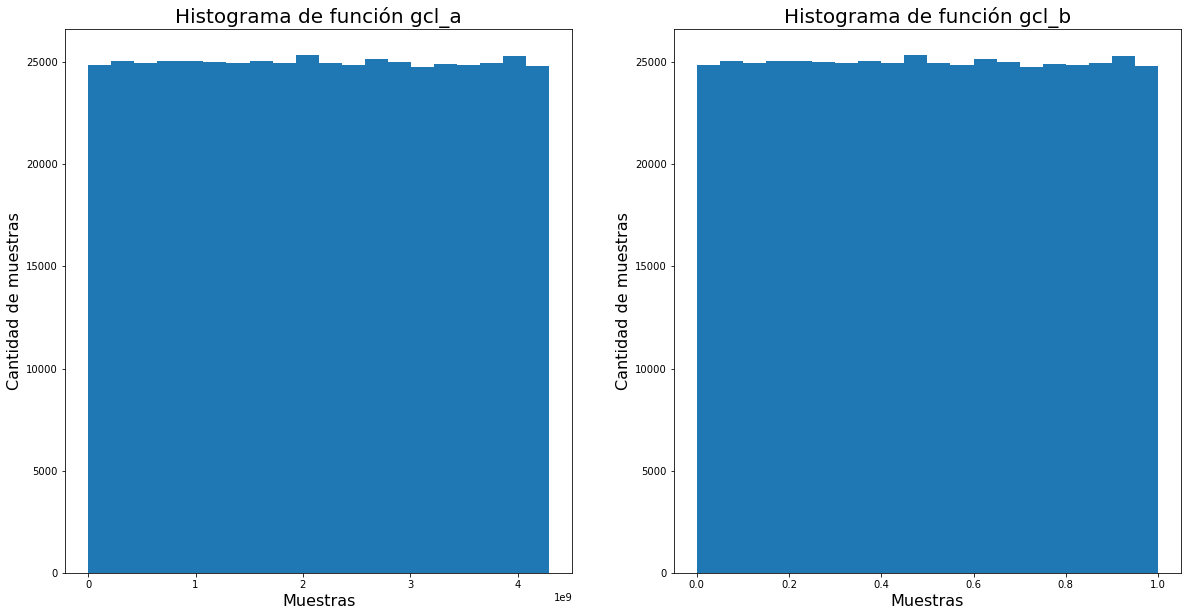

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.hist(results_a, bins = round(bins_a))
ax1.set_title('Histograma de función gcl_a', fontsize = 20)
ax1.set_xlabel("Muestras", fontsize = 16)
ax1.set_ylabel("Cantidad de muestras", fontsize = 16)
ax2.hist(results_b, bins = round(bins_b))
ax2.set_title('Histograma de función gcl_b', fontsize = 20)
ax2.set_xlabel("Muestras", fontsize = 16)
ax2.set_ylabel("Cantidad de muestras", fontsize = 16)
plt.show()

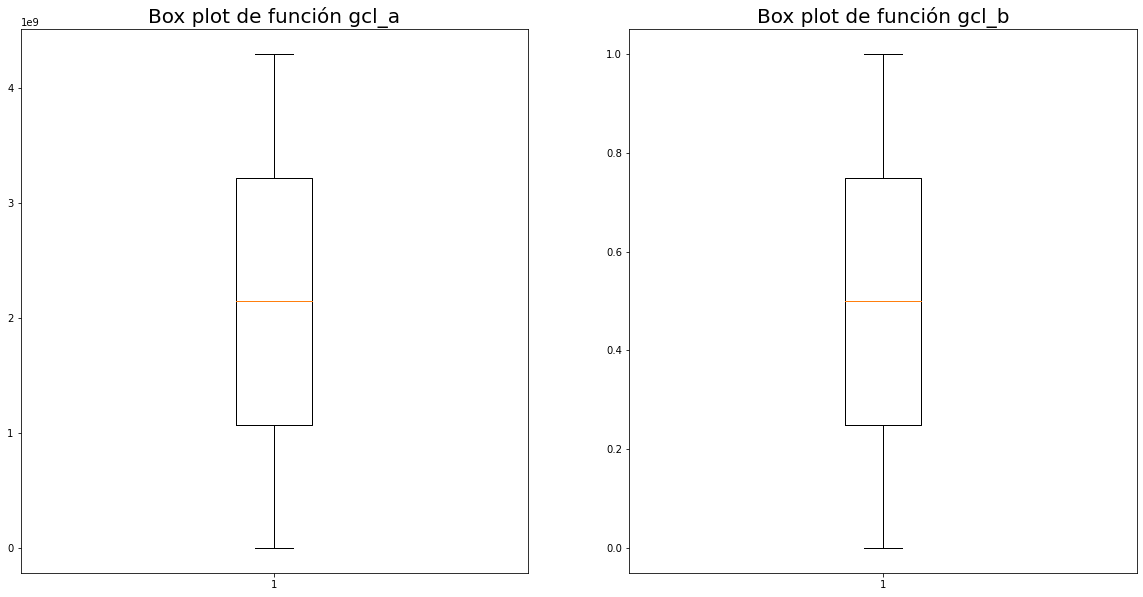

In [ ]:
fig, (ax3, ax4) = plt.subplots(1, 2,figsize=(20,10))
ax3.boxplot(results_a)
ax3.set_title('Box plot de función gcl_a', fontsize = 20)
ax4.boxplot(results_b)
ax4.set_title('Box plot de función gcl_b', fontsize = 20)
plt.show()

#### d) Basándose en el generador implementado en el ítem a, implemente el generador aditivo propuesto por Mitchell y Moore

###  Xn = ( Xn−24 + Xn−55) 𝑚𝑜𝑑 m   
#### donde 𝑥0,𝑥1,...,𝑥54 son números arbitrarios no todos iguales, n>=55 y m es par. 
##### (ver hoja 28 The Art of Computer Programming, Third Edition, Donald Knuth)

In [ ]:
 def gen_add(a,c,m,u0,cant_num):
    results = []
    seeds = gcl_a(a,c,m,u0,55); ##x0 a x54 = 55 posiciones
    j = 24
    k = 55
    mod = 2**24 # dato del enunciado del punto d
    for x in range(cant_num):
        seeds[k-1] = (seeds[k-1] + seeds[j-1]) % mod
        results.append(seeds[k-1])
        j-=1
        k-=1
        if(j == 0):
            j=55
        if(k == 0):
            k=55
    return results

In [ ]:
len(set(gcl_a(a,c,m,u0,55)))

55

In [ ]:
results_c = gen_add(a,c,m,u0,100000)

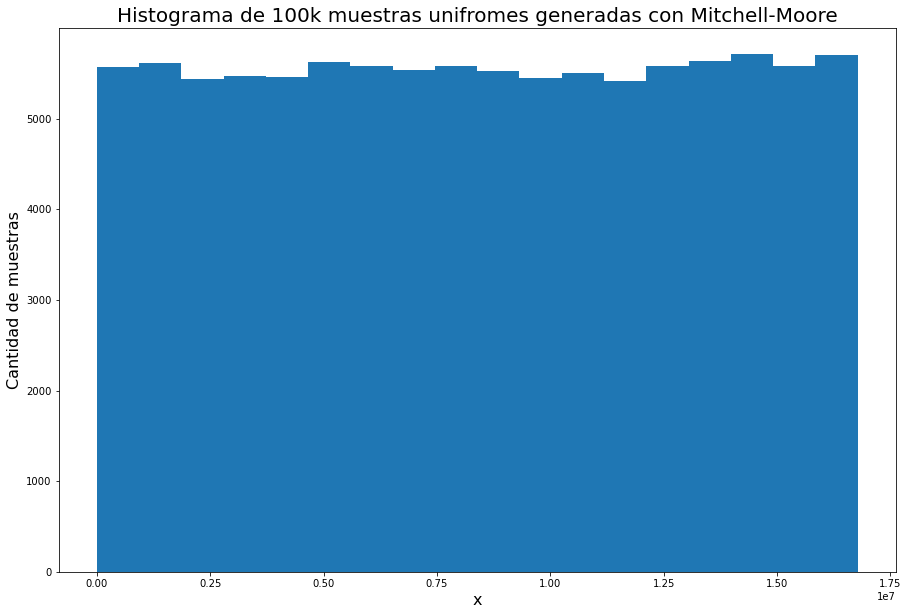

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(results_c, bins='sturges')
plt.title("Histograma de 100k muestras unifromes generadas con Mitchell-Moore", fontsize = 20)
plt.xlabel("x", fontsize = 16)
plt.ylabel("Cantidad de muestras", fontsize = 16)
plt.show()

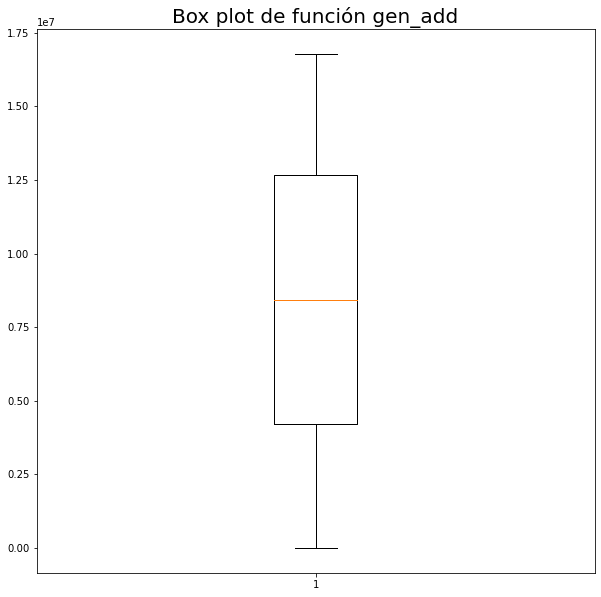

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(results_c)
ax.set_title('Box plot de función gen_add', fontsize = 20)
plt.show()

## Ejercicio 2

### Para cada uno de los generadores del ejercicio 1, proponer, y realizar, al menos 2 tests para evaluar su comportamiento. Evaluar e interpretar los resultados de cada uno para distintos tamaños de muestras.

## Test Chi2

In [ ]:
import random as rand
import pandas as pd
import scipy.stats as st

In [ ]:
def test_uniform_chi2(generator, alpha, N):
    results = generator(a,c,m,u0,N)
    (observed,_) = np.histogram(results, bins="sturges")
    
    p = 1/len(observed)
    expected = [N*p]*len(observed)
    (D2,p_valor) = st.chisquare(observed, expected)
    if p_valor < alpha:
        return D2, p_valor, 0
    else:
        return D2, p_valor, 1
    
def test_uniform_chi2_result(generator, alpha, N):
    (D2,p_valor,res) = test_uniform_chi2(generator, alpha, N)
    print("Estadístico: "+str(D2))
    print("P-valor: "+str(p_valor))
    if res == 0:
        print("Se rechaza la H0")
    else:
        print("No hay evidencia suficiente para rechazar H0")    

In [ ]:
generators = [gcl_a, gcl_b, gen_add]
alphas = [0.001, 0.005, 0.01, 0.03, 0.05, 0.07]
sample_sizes = [10000, 50000, 100000, 150000, 200000]
data = [np.zeros((len(alphas), len(sample_sizes))) for _ in range(len(generators))]
for g, generator in enumerate(generators):
    for i, alpha in enumerate(alphas):
        for j, sample_size in enumerate(sample_sizes):
            data[g][i][j] = test_uniform_chi2(generator, alpha, sample_size)[2]

dataframes = [[]]*len(generators)
for g in range(len(generators)):
    dataframes[g] = pd.DataFrame(data[g], index=[str(round(a*100, 1))+"%" for a in alphas], columns=[str(int(s/1000))+"k" for s in sample_sizes])

In [ ]:
dataframes[0]

,10k,50k,100k,150k,200k
0.1%,1.0,1.0,1.0,1.0,1.0
0.5%,1.0,1.0,1.0,1.0,1.0
1.0%,1.0,1.0,1.0,1.0,1.0
3.0%,1.0,1.0,1.0,1.0,1.0
5.0%,1.0,1.0,1.0,1.0,1.0
7.0%,1.0,1.0,1.0,1.0,1.0


In [ ]:
dataframes[1]

,10k,50k,100k,150k,200k
0.1%,1.0,1.0,1.0,1.0,1.0
0.5%,1.0,1.0,1.0,1.0,1.0
1.0%,1.0,1.0,1.0,1.0,1.0
3.0%,1.0,1.0,1.0,1.0,1.0
5.0%,1.0,1.0,1.0,1.0,1.0
7.0%,1.0,1.0,1.0,1.0,1.0


In [ ]:
dataframes[2]

,10k,50k,100k,150k,200k
0.1%,1.0,1.0,1.0,1.0,1.0
0.5%,1.0,1.0,1.0,1.0,1.0
1.0%,1.0,1.0,1.0,1.0,1.0
3.0%,1.0,1.0,1.0,1.0,1.0
5.0%,1.0,1.0,1.0,1.0,1.0
7.0%,1.0,0.0,1.0,1.0,1.0


## Test espectral

In [ ]:
from collections import deque

In [ ]:
def scatterplot(x, title, samples):
    y = deque(x)
    y.rotate(1)
    plt.figure()
    plt.scatter(x, y)
    plt.title(title + str(samples) + " muestras", fontsize = 20)
    plt.xlabel("x", fontsize = 16)
    plt.ylabel("y", fontsize = 16)
    plt.show()

In [ ]:
def scatterplot2(x, y, title, samples):
    plt.figure()
    plt.scatter(x, y)
    plt.title(title + str(samples) + " muestras", fontsize = 20)
    plt.xlabel("x", fontsize = 16)
    plt.ylabel("y", fontsize = 16)
    plt.show()

In [ ]:
sample_sizes = [100, 1000, 10000]

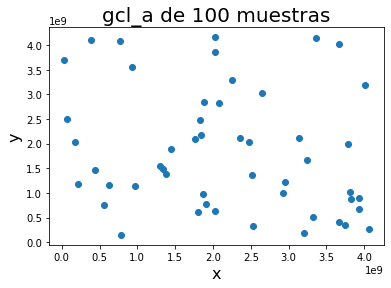

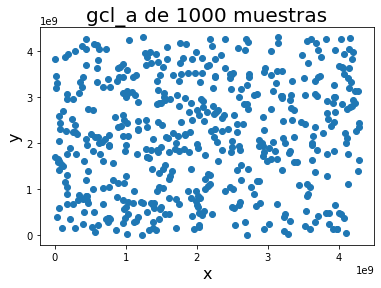

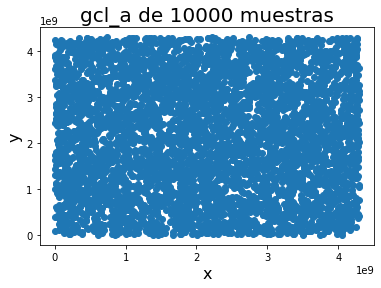

In [ ]:
for s in sample_sizes:
    x = gcl_a(a,c,m,u0,s)
    scatterplot2(x[0:int(len(x)/2)], x[int(len(x)/2):], "gcl_a de ", s)

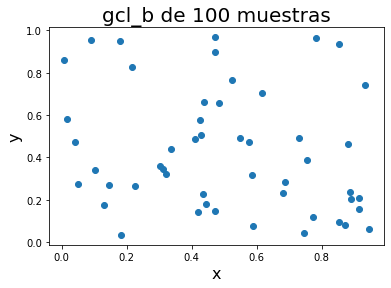

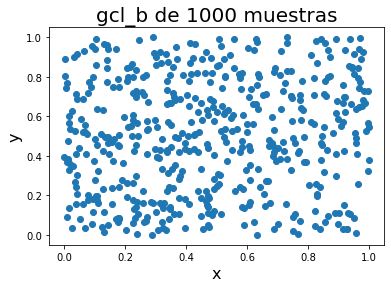

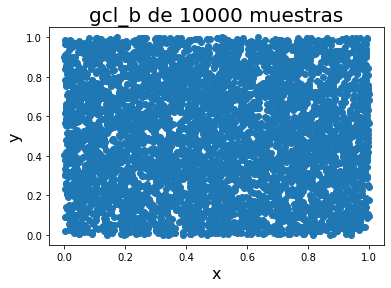

In [ ]:
for s in sample_sizes:
    x = gcl_b(a,c,m,u0,s)
    scatterplot2(x[0:int(len(x)/2)], x[int(len(x)/2):], "gcl_b de ", s)

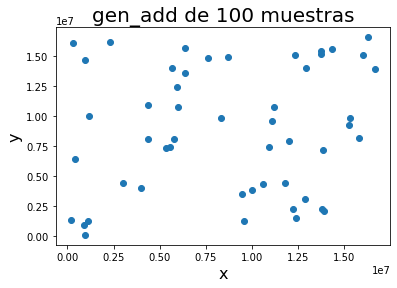

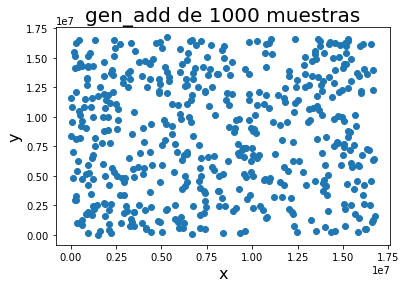

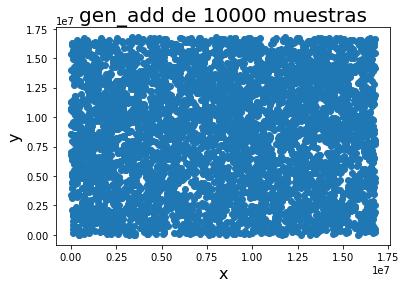

In [ ]:
for s in sample_sizes:
    x = gen_add(a,c,m,u0,s)
    scatterplot2(x[0:int(len(x)/2)], x[int(len(x)/2):], "gen_add de ", s)

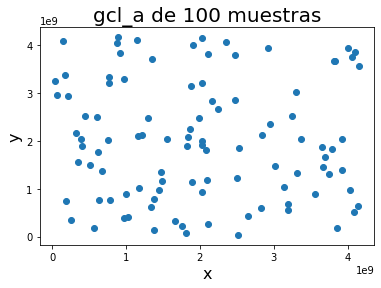

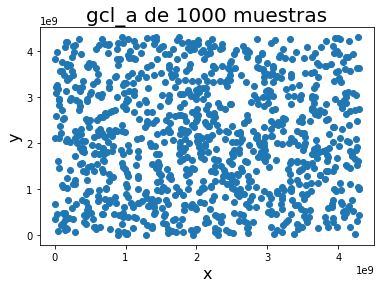

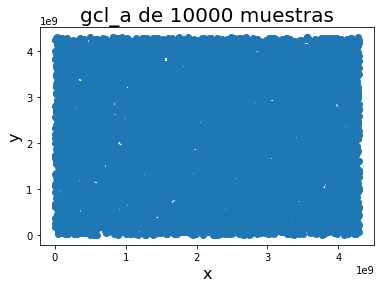

In [ ]:
for s in sample_sizes:
    scatterplot(gcl_a(a,c,m,u0,s), "gcl_a de ", s)

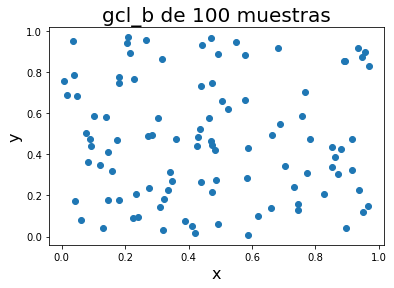

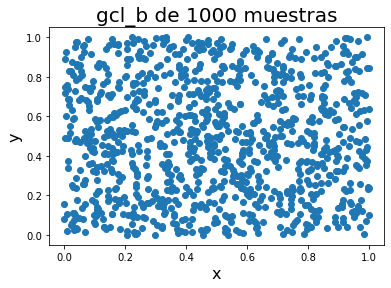

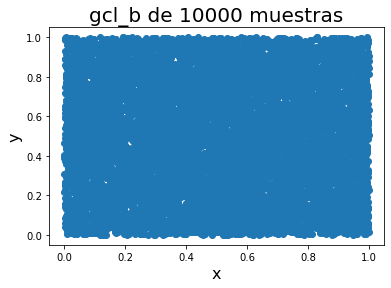

In [ ]:
for s in sample_sizes:
    scatterplot(gcl_b(a,c,m,u0,s), "gcl_b de ", s)

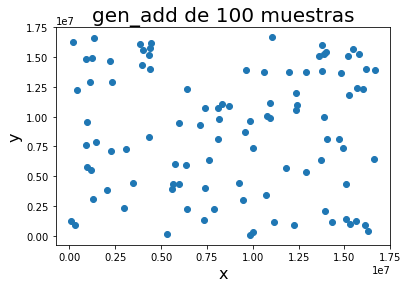

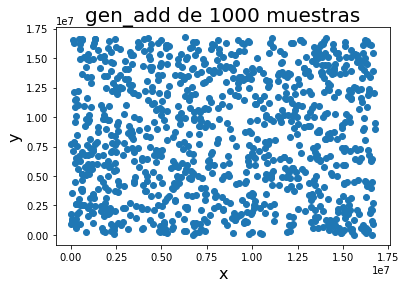

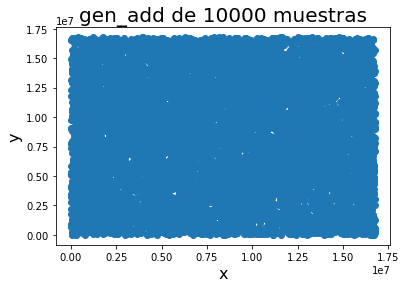

In [ ]:
for s in sample_sizes:
    scatterplot(gen_add(a,c,m,u0,s), "gen_add de ", s)

## Ejercicio 3

### Se desea generar puntos al azar con distribución uniforme dentro del área descripta en el gráfico utilizando los siguientes generadores de números al azar:

![circulo3.PNG](attachment:circulo3.PNG)

#### a) Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido para resolver el tp

In [ ]:
r = 5
start = 5
end = 15
center = (10, 10)

In [ ]:
def generate_uniform_samples_numpy(a, b, N):
    rng = np.random.default_rng()
    return (b - a) * rng.random(N) + a

def is_in_circle(point):
    return math.sqrt((point[0] - center[0])**2 + (point[1] - center[1])**2) <= r

In [ ]:
def generate_samples_in_circle(generator, N):
    x = list(generator(start, end, N))
    y = list(rand.sample(list(generator(start, end, N)), len(x)))

    result = []
    x_coords = []
    y_coords = []
    valid = 0
    for i in range(N):
        point = (x[i], y[i])
        if is_in_circle(point):
            result.append(point)
            x_coords.append(x[i])
            y_coords.append(y[i])
            valid += 1
    efficiency = valid/N
    return result, x_coords, y_coords, efficiency

In [ ]:
_, x_coords, y_coords, eff_npy = generate_samples_in_circle(generate_uniform_samples_numpy, 100000)

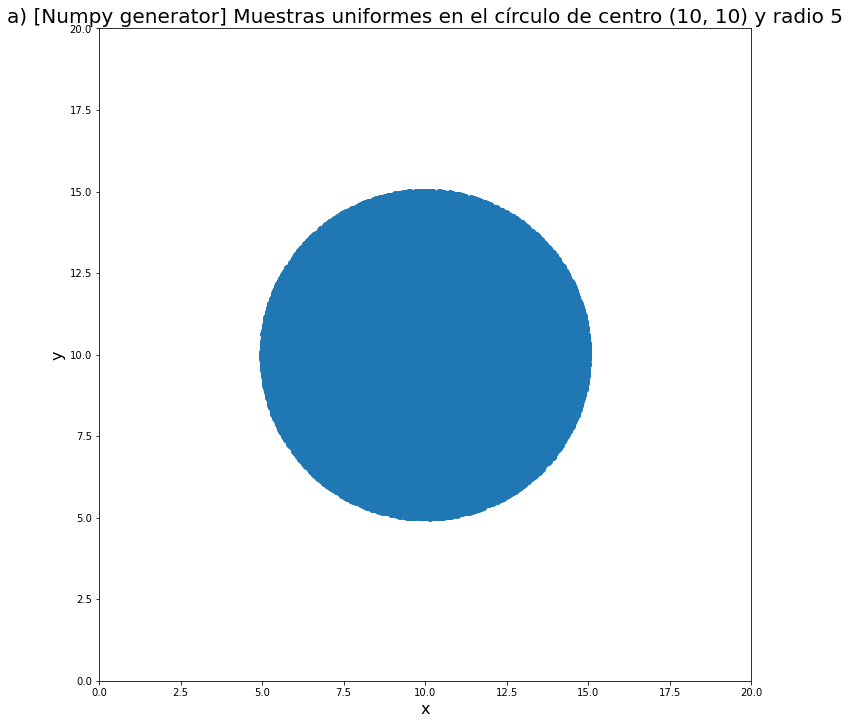

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(x_coords, y_coords)
ax.set_xlim((0,20))
ax.set_ylim((0,20))
ax.set_aspect("equal")
ax.set_title("a) [Numpy generator] Muestras uniformes en el círculo de centro (10, 10) y radio 5", fontsize = 20)
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
plt.show()

#### b) Alguno de los generadores de números al azar implementados con el algoritmo del ejercicio 1

In [ ]:
def generate_uniform_samples_1b(a, b, N):
    return [(b - a) * sample + a for sample in gcl_b(a,c,m,u0,N)]

In [ ]:
_, x_coords, y_coords, eff_gcl_b = generate_samples_in_circle(generate_uniform_samples_1b, 100000)

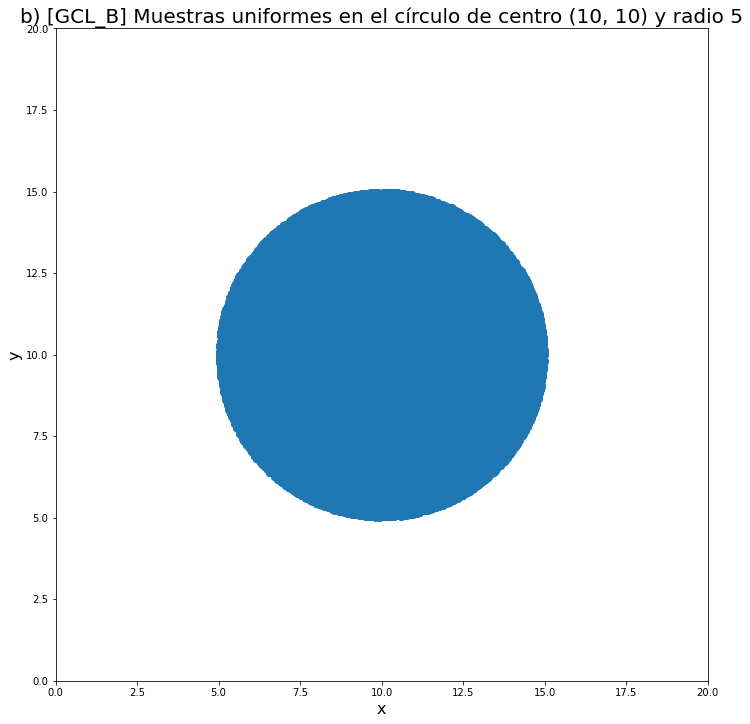

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(x_coords, y_coords)
ax.set_xlim((0,20))
ax.set_ylim((0,20))
ax.set_aspect("equal")
ax.set_title("b) [GCL_B] Muestras uniformes en el círculo de centro (10, 10) y radio 5", fontsize = 20)
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
plt.show()

#### c) Calcule el factor de rendimiento del método

In [ ]:
print(eff_npy)
print(eff_gcl_b)

0.78362
0.78721


In [ ]:
square_area = 10*10
circle_area = math.pi*r**2
print(circle_area/square_area)

0.7853981633974483


## Ejercicio 4

### Para la siguiente densidad de probabilidad, se pide:

##### - 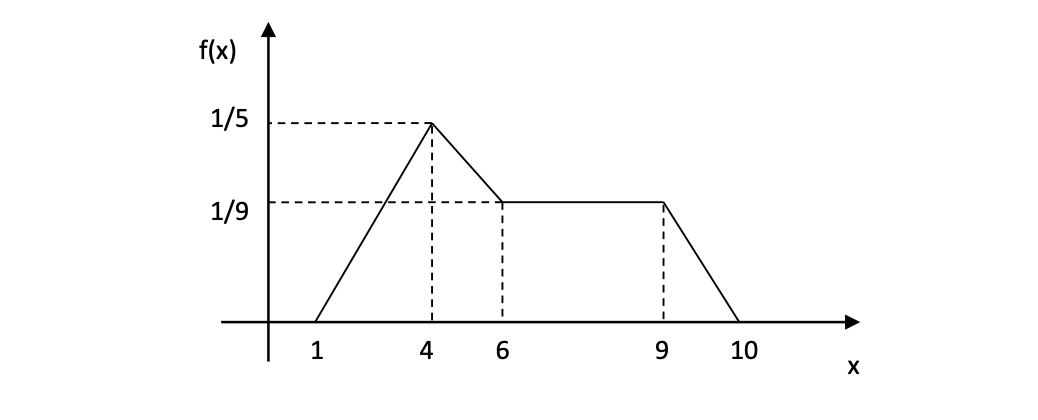

#### a) Definir la función de densidad de probabilidad

In [ ]:
def pdf(x):
    if x <= 1: return 0
    if x <= 4: return (1/15)*x+(-1/15)
    if x <= 6: return (-2/45)*x+(17/45)
    if x <= 9: return 1/9
    if x <= 10: return (-1/9)*x+(10/9)
    return 0

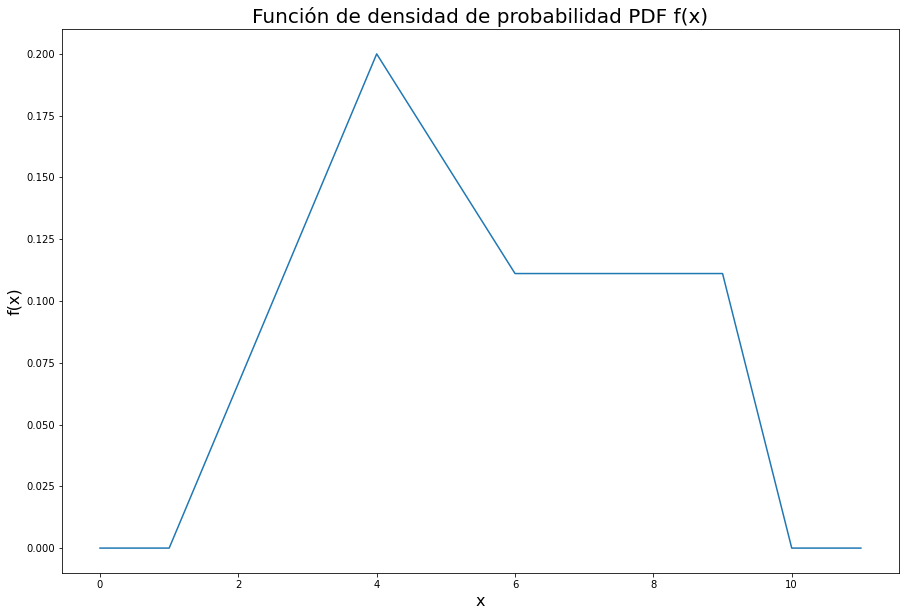

In [ ]:
plt.figure(figsize=(15,10))
plt.plot([pdf(x) for x in range(12)])
plt.title("Función de densidad de probabilidad PDF f(x)", fontsize = 20)
plt.xlabel("x", fontsize = 16)
plt.ylabel("f(x)", fontsize = 16)
plt.show()

#### b) Calcular y graficar la función de probabilidad acumulada y su inversa

In [ ]:
from sympy import *

In [ ]:
def cdf(x):
    t = Symbol('t')
    if x <= 1: return 0
    if x <= 4: return (lambda x: integrate((1/15)*t+(-1/15),(t,1,x)))(x)
    if x <= 6: return integrate((1/15)*t+(-1/15),(t,1,4)) + (lambda x: integrate((-2/45)*t+(17/45),(t,4,x)))(x)
    if x <= 9: return integrate((1/15)*t+(-1/15),(t,1,4)) + integrate((-2/45)*t+(17/45),(t,4,6)) + (lambda x: integrate(1/9,(t,6,x)))(x)
    if x <= 10: return integrate((1/15)*t+(-1/15),(t,1,4)) + integrate((-2/45)*t+(17/45),(t,4,6)) + integrate(1/9,(t,6,9)) + (lambda x: integrate((-1/9)*t+(10/9),(t,9,x)))(x)
    return 1

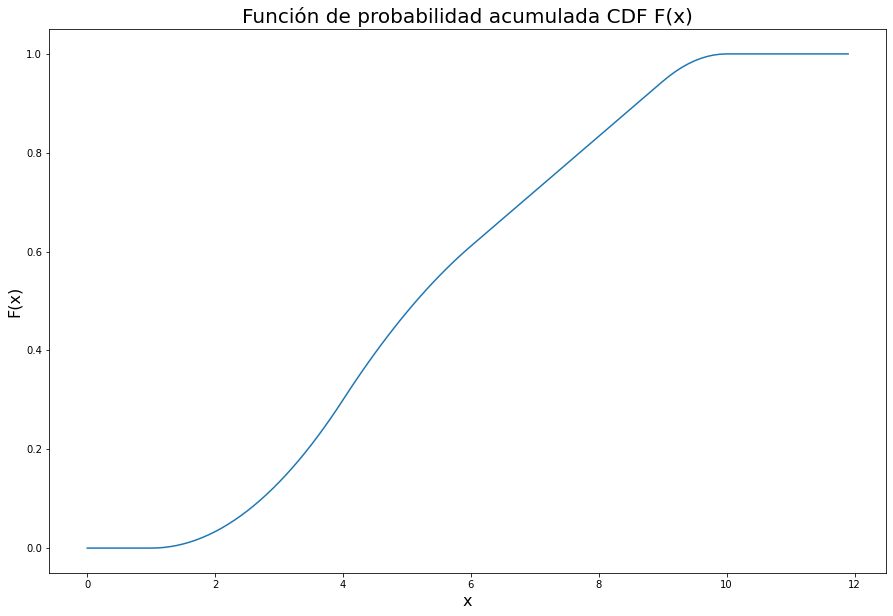

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(0, 12, 0.1), [cdf(x) for x in np.arange(0, 12, 0.1)])
plt.title("Función de probabilidad acumulada CDF F(x)", fontsize = 20)
plt.xlabel("x", fontsize = 16)
plt.ylabel("F(x)", fontsize = 16)
plt.show()

## ------------ COMIENZO CUENTAS AUXILIARES ------------

In [ ]:
t = Symbol('t')
integrate((1/15)*t+(-1/15),(t,1,t))

0.0333333333333333*t**2 - 0.0666666666666667*t + 0.0333333333333333

In [ ]:
(lambda x: integrate((1/15)*t+(-1/15),(t,1,x)))(1)

0

In [ ]:
integrate((1/15)*t+(-1/15),(t,1,4))

0.300000000000000

In [ ]:
integrate((-2/45)*t+(17/45),(t,4,t))

-0.0222222222222222*t**2 + 0.377777777777778*t - 1.15555555555556

In [ ]:
integrate((1/15)*t+(-1/15),(t,1,4))

0.300000000000000

In [ ]:
integrate((-2/45)*t+(17/45),(t,4,6))

0.311111111111111

In [ ]:
integrate(1/9,(t,6,t))

0.111111111111111*t - 0.666666666666667

In [ ]:
integrate((1/15)*t+(-1/15),(t,1,4)) + integrate((-2/45)*t+(17/45),(t,4,6)) + integrate(1/9,(t,6,9))

0.944444444444445

In [ ]:
integrate((-1/9)*t+(10/9),(t,9,t))

-0.0555555555555556*t**2 + 1.11111111111111*t - 5.5

## ------------ FIN CUENTAS AUXILIARES ------------

In [ ]:
def inv_cdf(u):
    if u <= 3/10: return 1 + math.sqrt(30*u)
    if u <= 11/18: return 17/2 - math.sqrt(-45*(u - 3/4))
    if u <= 17/18: return 9*(u + 1/18)
    return 10 - math.sqrt(-18*(u - 1))

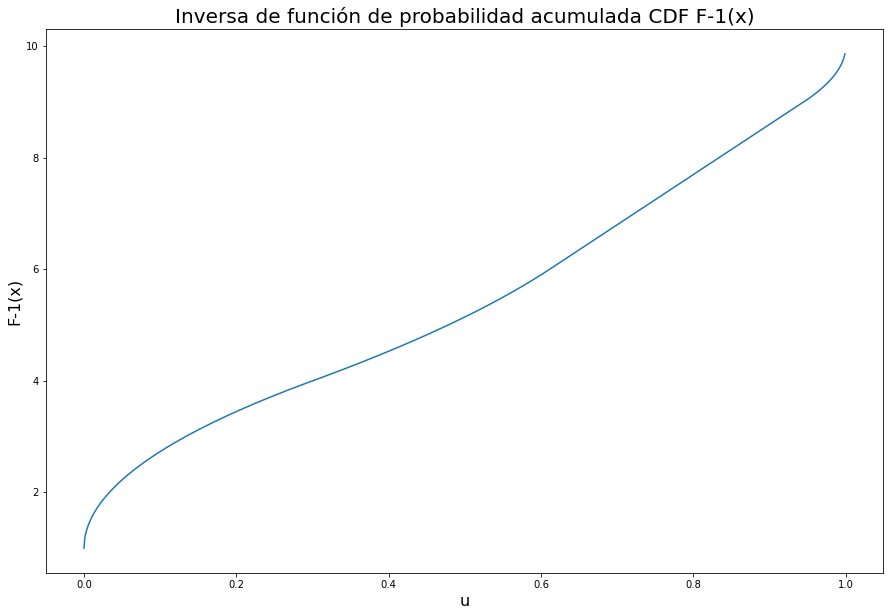

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(0, 1, 0.001), [inv_cdf(u) for u in np.arange(0, 1, 0.001)])
plt.title("Inversa de función de probabilidad acumulada CDF F-1(x)", fontsize = 20)
plt.xlabel("u", fontsize = 16)
plt.ylabel("F-1(x)", fontsize = 16)
plt.show()

#### c) Utilizando el generador de números aleatorios implementado en el ítem b del ejercicio 1, genere números al azar con la distribución propuesta

In [ ]:
N = 100000
samples = [inv_cdf(u) for u in gcl_b(a,c,m,u0,N)]

#### d) Realice los gráficos que considere necesarios para mostrar la distribución de números al azar generados

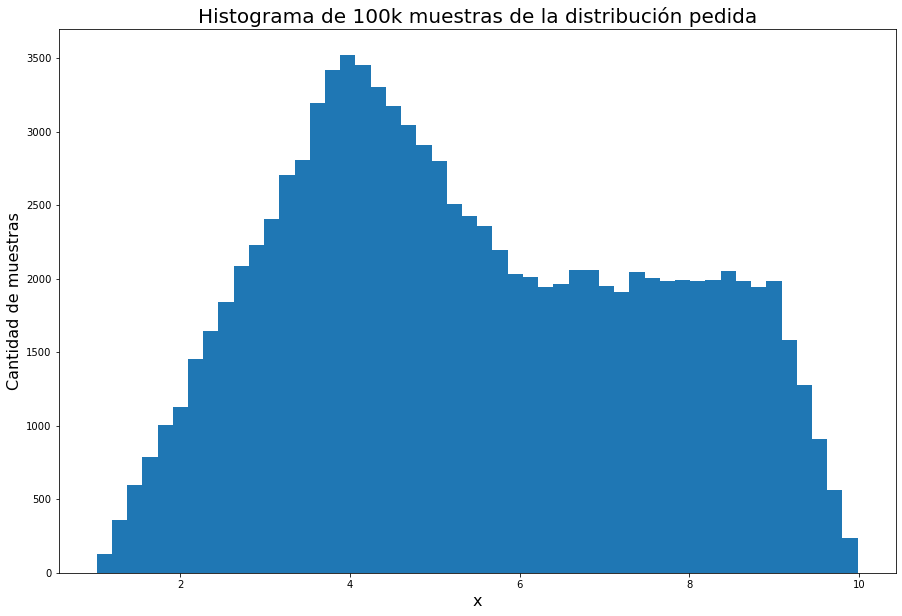

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(samples, bins=50)
plt.title("Histograma de 100k muestras de la distribución pedida", fontsize = 20)
plt.xlabel("x", fontsize = 16)
plt.ylabel("Cantidad de muestras", fontsize = 16)
plt.show()

## Ejercicio 5

### Implemente un método para generar variables aleatorias con distribución normal con media 15 y desvío 3. Muestre gráficamente la distribución que siguen los números pseudoaleatorios generados. Realice 2 tests de los explicados en la materia para verificar si los números generados siguen la distribución pedida (evalué los resultados para distintos tamaños de muestra)

In [ ]:
def norm_01(N):
  X = []
  c = 2 * st.norm.pdf(1) / st.expon.pdf(1) # c = sqrt(2*exp(1)/pi) <- result, t=1
  i = 0
  while (i < N):
    t = np.random.exponential() # la podria generar con una uniforme y usar la funcion inversa (se hace mas abajo)
    y = np.random.uniform()
    p =  st.norm.pdf(t)/(c*st.expon.pdf(t)) #Probabilidad de aceptar, pdf = probability density function
    if (y < p):
      i+=1
      if np.random.uniform() <= 0.5:
        X.append(t)
      else:
        X.append(-1*t)
  return X

def norm_mu_sigma(mu,sigma,N):
  X = norm_01(N)
  return [(number * sigma + mu) for number in X]  # Z = (X - mu)/sigma -> x = (z*sigma)+mu

In [ ]:
N = 100000
MU = 15
SIGMA = 3

In [ ]:
results = norm_mu_sigma(MU,SIGMA,N)
result_01 = norm_01(N)

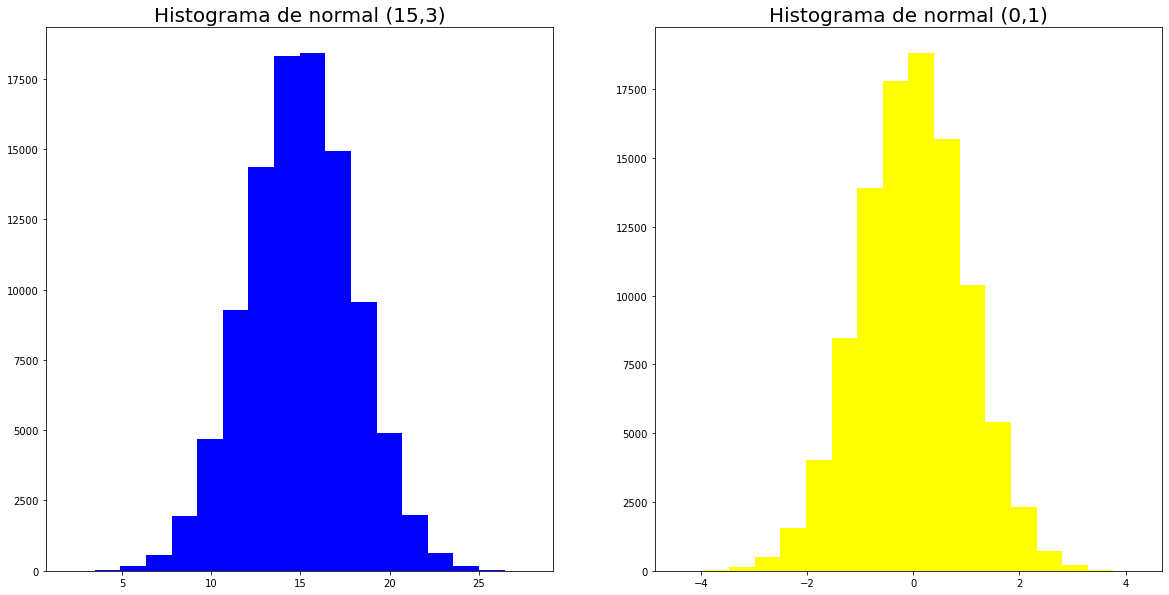

Media:  15.006272153576099
Varianza:  9.01038627856473
Media normal 01:  -0.0015701291340399278
Varianza normal 01:  1.0046312046936021


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.hist(results, bins = 'sturges',color='blue')
ax1.set_title('Histograma de normal (15,3)', fontsize = 20)
ax2.hist(result_01, bins = 'sturges',color = 'yellow')
ax2.set_title('Histograma de normal (0,1)', fontsize = 20)
plt.show()
print ('Media: ',np.mean(results)) # media = 15 Ok
print ('Varianza: ',np.var(results)) # varianza = sigma**2 -> 9 = 3**2 Ok

print ('Media normal 01: ',np.mean(result_01))
print ('Varianza normal 01: ',np.var(result_01)) 

In [ ]:
def norm_01_b(N):
  X = []
  c = 2 * st.norm.pdf(1) / st.expon.pdf(1) # c = sqrt(2*exp(1)/pi) <- result, t=1
  i = 0
  while (i < N):
    y = np.random.uniform()
    x = np.random.uniform()
    t = - np.log(x)    
    p =  st.norm.pdf(t)/(c*st.expon.pdf(t)) #Probabilidad de aceptar, pdf = probability density function
    if (y < p):
      i+=1
      if np.random.uniform() <= 0.5:
        X.append(t)
      else:
        X.append(-1*t)
  return X

def norm_mu_sigma_b(mu,sigma,N):
  X = norm_01_b(N)
  return [(number * sigma + mu) for number in X]  # Z = (X - mu)/sigma -> x = (z*sigma)+mu

In [ ]:
results_b = norm_mu_sigma_b(MU,SIGMA,N)
result_01_b = norm_01_b(N)

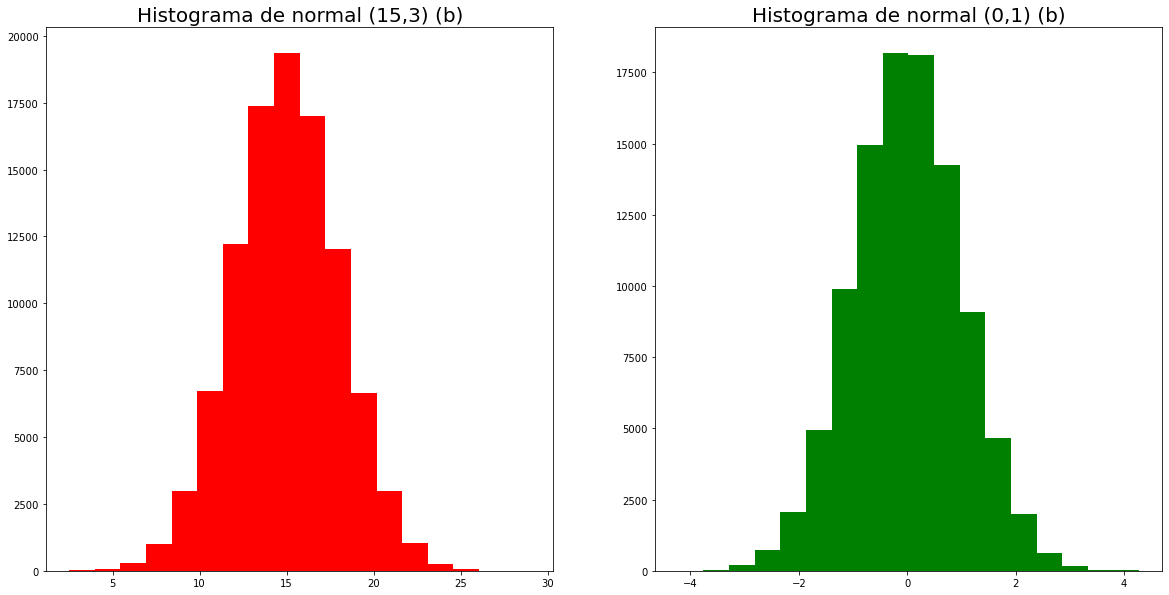

Media (b):  15.000618282350441
Varianza (b):  8.993591436645572
Media normal 01 (b):  -0.003928754237953474
Varianza normal 01 (b):  0.9991059914940891


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.hist(results_b, bins = 'sturges',color='red')
ax1.set_title('Histograma de normal (15,3) (b)', fontsize = 20)
ax2.hist(result_01_b, bins = 'sturges',color = 'green')
ax2.set_title('Histograma de normal (0,1) (b)', fontsize = 20)
plt.show()
print ('Media (b): ',np.mean(results_b))
print ('Varianza (b): ',np.var(results_b))

print ('Media normal 01 (b): ',np.mean(result_01_b))
print ('Varianza normal 01 (b): ',np.var(result_01_b)) 

In [ ]:
# a,c y m parametros del punto 1
def norm_01_c(N):
  res = []
  Y = gcl_b(a,c,m,u0,N) # utilizo el generador del punto 1
  X = gcl_b(a,c,m,u0,N+1)
  cte = 2 * st.norm.pdf(1) / st.expon.pdf(1) # cte = sqrt(2*exp(1)/pi) <- result, t=1
  i = 0
  while (i < N):
    y = Y[i]  
    x = X[i+1]  # tengo que hacer que no tome la misma posicion de numero aleatorio porque sino estaria usando el mismo en x e y.
    t = - np.log(x)    
    p =  st.norm.pdf(t)/(cte*st.expon.pdf(t)) #Probabilidad de aceptar, pdf = probability density function
    i+=1
    if (y < p):
      if np.random.uniform() <= 0.5:
        res.append(t)
      else:
        res.append(-1*t)
  return res

def norm_mu_sigma_c(mu,sigma,N):
  X = norm_01_c(N)
  return [(number * sigma + mu) for number in X]  # Z = (X - mu)/sigma -> x = (z*sigma)+mu

In [ ]:
results_c = norm_mu_sigma_c(MU,SIGMA,N)
result_01_c = norm_01_c(N)

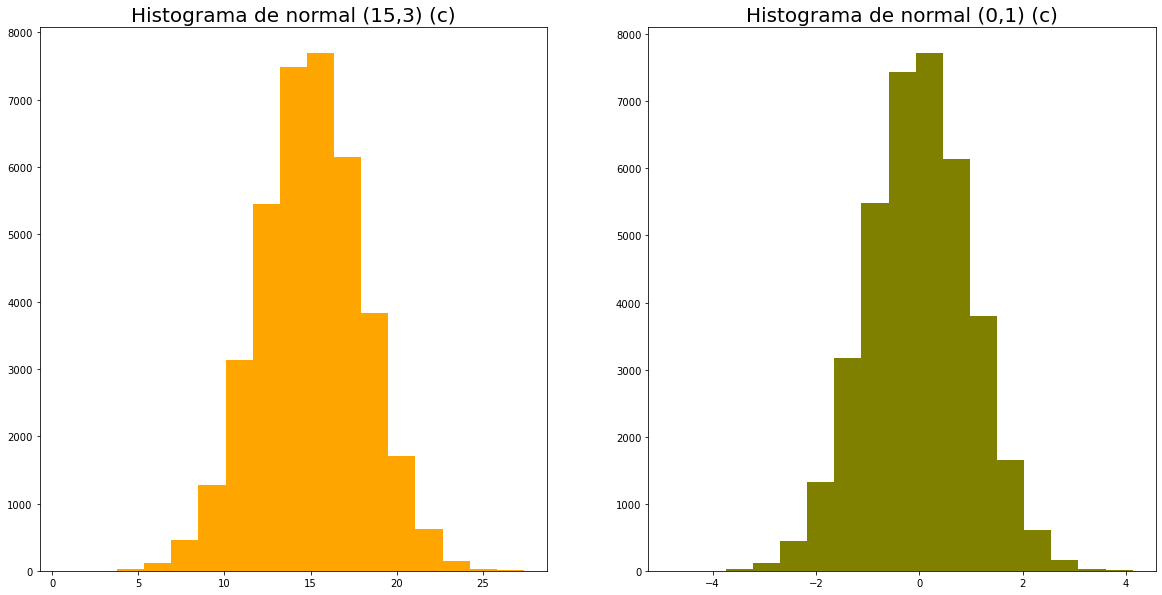

Media (c):  15.012196545698478
Varianza (c):  9.019075554635927
Media normal 01 (c):  -0.003199080176498316
Varianza normal 01 (c):  1.0021258003707911


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.hist(results_c, bins = 'sturges',color='orange')
ax1.set_title('Histograma de normal (15,3) (c)', fontsize = 20)
ax2.hist(result_01_c, bins = 'sturges',color = 'olive')
ax2.set_title('Histograma de normal (0,1) (c)', fontsize = 20)
plt.show()
print ('Media (c): ',np.mean(results_c))
print ('Varianza (c): ',np.var(results_c))

print ('Media normal 01 (c): ',np.mean(result_01_c))
print ('Varianza normal 01 (c): ',np.var(result_01_c)) 

Realice 2 tests de los explicados en la materia para verificar si los números generados siguen la distribución pedida (evalué los resultados para distintos tamaños de muestra).

In [ ]:
def calculate_pk(mu,sigma,k):
  pk = np.zeros(k)
  for i in range(k): # necesitamos minimo 10 casos en cada clase, si media 15 y varianza 9 los valores van de 6 a 24 -> (5,25)
    inf = st.norm.cdf(5+i, mu, sigma)
    sup = st.norm.cdf(5+i+1, mu, sigma)
    pk[i] = sup - inf
  return pk

def test_chi2_normal(generator, alpha,mu,sigma, N):
    results = generator(mu,sigma,N)
    k = 20 #tengo varianza 9, entonces un buen numero puede ser 10 clases a derecha y 10 a izquierda de la media
    pk = calculate_pk(mu,sigma,k)
    observed,bins = np.histogram(results, bins=[0,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,30])
    expected = N*pk   #pk es un vector de k posiciones y en cada una esta la frecuencia esperada para una muestra de cantidad N
    (D2,p_valor) = st.chisquare(observed, expected)
    if p_valor < alpha:
        return D2, p_valor, 0
    else:
        return D2, p_valor, 1
    
def test_chi2_normal_result(generator, alpha,mu,sigma, N):
    (D2,p_valor,res) = test_chi2_normal(generator, alpha,mu,sigma, N)
    print("Estadístico: "+str(D2))
    print("Alpha: "+str(alpha))
    print("P-valor: "+str(p_valor))
    print("N: ",N)

    if res == 0:
        print("Se rechaza la H0")
    else:
        print("No hay evidencia suficiente para rechazar H0")
    print("")

In [ ]:
test_chi2_normal_result(norm_mu_sigma,0.01,MU,SIGMA,1000)
test_chi2_normal_result(norm_mu_sigma,0.05,MU,SIGMA,1000)
test_chi2_normal_result(norm_mu_sigma,0.1,MU,SIGMA,1000)
test_chi2_normal_result(norm_mu_sigma,0.01,MU,SIGMA,10000)
test_chi2_normal_result(norm_mu_sigma,0.05,MU,SIGMA,10000)
test_chi2_normal_result(norm_mu_sigma,0.1,MU,SIGMA,10000)
test_chi2_normal_result(norm_mu_sigma,0.01,MU,SIGMA,100000)
test_chi2_normal_result(norm_mu_sigma,0.05,MU,SIGMA,100000)
test_chi2_normal_result(norm_mu_sigma,0.1,MU,SIGMA,100000)

Estadístico: 9.567065512572203
Alpha: 0.01
P-valor: 0.962829748856634
N:  1000
No hay evidencia suficiente para rechazar H0

Estadístico: 13.52359854521894
Alpha: 0.05
P-valor: 0.8107215758990206
N:  1000
No hay evidencia suficiente para rechazar H0

Estadístico: 15.678235891809607
Alpha: 0.1
P-valor: 0.6786266944876909
N:  1000
No hay evidencia suficiente para rechazar H0

Estadístico: 16.740378431527663
Alpha: 0.01
P-valor: 0.6074515503724351
N:  10000
No hay evidencia suficiente para rechazar H0

Estadístico: 38.644508592925845
Alpha: 0.05
P-valor: 0.0049087478881635355
N:  10000
Se rechaza la H0

Estadístico: 31.271178180716493
Alpha: 0.1
P-valor: 0.03769001119499948
N:  10000
Se rechaza la H0

Estadístico: 52.0229205955382
Alpha: 0.01
P-valor: 6.564100867496226e-05
N:  100000
Se rechaza la H0

Estadístico: 53.27749935899616
Alpha: 0.05
P-valor: 4.2503060780511134e-05
N:  100000
Se rechaza la H0

Estadístico: 78.5451120293483
Alpha: 0.1
P-valor: 3.3083965383366553e-09
N:  100000
Se

In [ ]:
# Anderson-Darling Test (Ejemplo clase)
from scipy.stats import anderson
def anderson_test(generator,mu,sigma, N):
  results = generator(mu,sigma, N)
  value = anderson(results)
  for i in range(len(value.critical_values)):
    nivel_significancia, umbral = value.significance_level[i]/100, value.critical_values[i]
    print("Alpha: "+str(nivel_significancia))
    print("Estadistico: "+str(value.statistic))
    print("Umbral: "+str(umbral))
    if (value.statistic > value.critical_values[i]):
      print('Datos No normales -> Rechazo H0')
    else:
      print('Datos normales (No rechazo H0)')

In [ ]:
anderson_test(norm_mu_sigma,MU,SIGMA,1000)

Alpha: 0.15
Estadistico: 0.3646655229233602
Umbral: 0.574
Datos normales (No rechazo H0)
Alpha: 0.1
Estadistico: 0.3646655229233602
Umbral: 0.653
Datos normales (No rechazo H0)
Alpha: 0.05
Estadistico: 0.3646655229233602
Umbral: 0.784
Datos normales (No rechazo H0)
Alpha: 0.025
Estadistico: 0.3646655229233602
Umbral: 0.914
Datos normales (No rechazo H0)
Alpha: 0.01
Estadistico: 0.3646655229233602
Umbral: 1.088
Datos normales (No rechazo H0)


In [ ]:
def test_ks_normal_result_b(generator, alpha,mu,sigma, N):
  results = generator(mu,sigma,N)
  (D2,p_valor) = st.kstest(results, "norm", args=(mu, sigma), alternative="greater")
  print("Estadístico: "+str(D2))
  print("Alpha: "+str(alpha))
  print("P-valor: "+str(p_valor))
  print("N: ",N)
  if p_valor < alpha:
        print("Se rechaza la H0")
  else:
    print("No hay evidencia suficiente para rechazar H0")
  print("")

In [ ]:
test_ks_normal_result_b(norm_mu_sigma,0.01,MU,SIGMA,1000)
test_ks_normal_result_b(norm_mu_sigma,0.05,MU,SIGMA,1000)
test_ks_normal_result_b(norm_mu_sigma,0.1,MU,SIGMA,1000)
test_ks_normal_result_b(norm_mu_sigma,0.01,MU,SIGMA,10000)
test_ks_normal_result_b(norm_mu_sigma,0.05,MU,SIGMA,10000)
test_ks_normal_result_b(norm_mu_sigma,0.1,MU,SIGMA,10000)
test_ks_normal_result_b(norm_mu_sigma,0.01,MU,SIGMA,100000)
test_ks_normal_result_b(norm_mu_sigma,0.05,MU,SIGMA,100000)
test_ks_normal_result_b(norm_mu_sigma,0.1,MU,SIGMA,100000)

Estadístico: 0.015204967186213725
Alpha: 0.01
P-valor: 0.6234796695965906
N:  1000
No hay evidencia suficiente para rechazar H0

Estadístico: 0.006245554430194367
Alpha: 0.05
P-valor: 0.9211241558105366
N:  1000
No hay evidencia suficiente para rechazar H0

Estadístico: 0.022402087337555776
Alpha: 0.1
P-valor: 0.36112500885919885
N:  1000
No hay evidencia suficiente para rechazar H0

Estadístico: 0.008022551739254813
Alpha: 0.01
P-valor: 0.2745656341260486
N:  10000
No hay evidencia suficiente para rechazar H0

Estadístico: 0.011708963337178191
Alpha: 0.05
P-valor: 0.06393903188579299
N:  10000
No hay evidencia suficiente para rechazar H0

Estadístico: 0.005025303081598598
Alpha: 0.1
P-valor: 0.6014479885754175
N:  10000
No hay evidencia suficiente para rechazar H0

Estadístico: 0.002793140551924256
Alpha: 0.01
P-valor: 0.2096767620864238
N:  100000
No hay evidencia suficiente para rechazar H0

Estadístico: 0.0010394328449327347
Alpha: 0.05
P-valor: 0.8051097672161396
N:  100000
No hay

## Ejercicio 6

### En el trabajo práctico se incluye un archivo con números pseudoaleatorios. Determine, y justifique, a cuál de las siguientes distribuciones pertenecen los números suministrados:

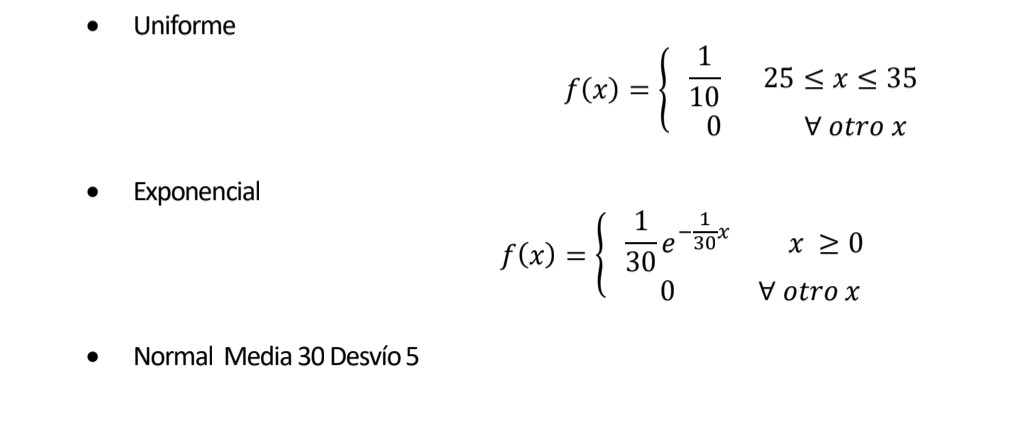

### Valide contra cada una de las 3 hipótesis los números suministrados.

In [1]:
import os
notebook_path = os.path.abspath("Ejercicios 1-6.ipynb")
random_numbers_file = os.path.join(os.path.dirname(notebook_path), "random_numbers.txt")

In [2]:
random_numbers = []
with open(random_numbers_file) as f:
    for number in f:
        if number != "\n": random_numbers.append(float(number.rstrip()))

FileNotFoundError: ignored

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(random_numbers, bins='sturges')
plt.title("Histograma de números aleatorios provistos", fontsize = 20)
plt.xlabel("x", fontsize = 16)
plt.ylabel("Cantidad de muestras", fontsize = 16)
plt.show()

In [ ]:
print("Media: ", np.mean(random_numbers))
print("Varianza: ", np.var(random_numbers))
print("Desvío: ", math.sqrt(np.var(random_numbers)))

In [ ]:
print("Test KS: uniforme entre 25 y 35")
D, p_valor = st.kstest(random_numbers, "uniform", args=(25, 10), alternative="greater")
print("Estadístico: ", D)
print("P valor: ", p_valor)
print("")
print("Test KS: exponencial de lambda 1/30")
D, p_valor = st.kstest(random_numbers, "expon", args=(0, 30), alternative="greater")
print("Estadístico: ", D)
print("P valor: ", p_valor)
print("")
print("Test KS: normal de media 30 y desvío 5")
D, p_valor = st.kstest(random_numbers, "norm", args=(30, 5), alternative="greater")
print("Estadístico: ", D)
print("P valor: ", p_valor)